# IBM HR Analytics Employee Attrition & Performance

***

# Lib's

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score


# Dataset

In [2]:
df_raw = pd.read_csv('dataset.csv', sep = ',', encoding = 'latin-1')
df_raw.head()

,ï»¿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# validation data
df_validation = df_raw.sample(frac = 0.20)

# split df and validation data
df_raw = df_raw[~df_raw.index.isin(df_validation.index)]

## Data Type

In [4]:
# shape
df_raw.shape

(1176, 35)

In [5]:
# data types
df_raw.dtypes

ï»¿Age                       int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# rename first column (ï»¿Age)
df_raw.rename(columns = {'ï»¿Age' : 'Age'}, inplace = True)

df_raw.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Null Values

In [7]:
df_raw.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Visualizing dataset
df_raw.sample(5).T

,1223,1213,1374,1121,545
Age,47,23,58,36,30
Attrition,Yes,Yes,No,No,No
BusinessTravel,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,1093,427,605,884,501
Department,Sales,Sales,Sales,Sales,Sales
DistanceFromHome,9,7,21,1,27
Education,3,3,3,4,5
EducationField,Life Sciences,Life Sciences,Life Sciences,Life Sciences,Marketing
EmployeeCount,1,1,1,1,1
EmployeeNumber,1716,1702,1938,1585,747


## Data Dimensions

In [9]:
df1 = df_raw.copy()

As we can see, this dataset has 35 different features, so, in order to see how data is distributed in each attribute, we gonna check each percentage.

In [10]:
cols = df1.columns

def value_counts():
    for d in df1[cols]:
        print((df1[d].value_counts(normalize = True) * 100).sort_values(ascending = False))
        
value_counts()

35    5.697279
34    5.187075
29    5.017007
36    4.931973
31    4.676871
30    4.166667
38    3.996599
32    3.826531
40    3.571429
33    3.486395
27    3.316327
37    3.316327
28    3.231293
41    2.976190
42    2.976190
39    2.976190
26    2.806122
45    2.380952
43    2.295918
44    2.210884
46    2.210884
49    1.785714
25    1.785714
47    1.615646
24    1.615646
48    1.530612
50    1.530612
54    1.530612
55    1.445578
52    1.275510
53    1.190476
51    1.105442
22    1.105442
21    0.935374
56    0.935374
20    0.935374
23    0.850340
58    0.850340
59    0.850340
19    0.595238
18    0.595238
57    0.340136
60    0.340136
Name: Age, dtype: float64
No     83.758503
Yes    16.241497
Name: Attrition, dtype: float64
Travel_Rarely        71.428571
Travel_Frequently    18.622449
Non-Travel            9.948980
Name: BusinessTravel, dtype: float64
1082    0.425170
1329    0.425170
530     0.425170
117     0.340136
977     0.340136
          ...   
740     0.085034
478     0.0850

In [11]:
# dropping features Over18 and StandardHours
df1.drop(columns=(['Over18', 'StandardHours', 'EmployeeCount']), inplace = True)

# Descriptive Analysis

## Dependent Variable

In [12]:
df1['Attrition'].value_counts()

No     985
Yes    191
Name: Attrition, dtype: int64

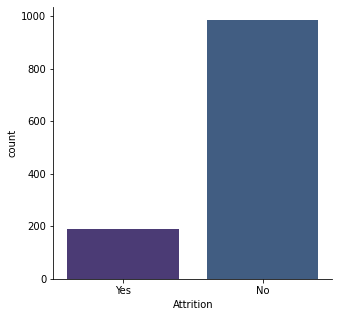

In [13]:
sns.set_palette("viridis")

plt.figure(figsize = (5,5))
sns.countplot(data = df1, x = 'Attrition')
sns.despine();

## Numerical Variables

In [14]:
# Selecting numerical variables
num_variables = df1.select_dtypes(include = ['int64', 'float64'])
num_variables.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [15]:
# add Attrition variable
num_variables = num_variables.merge(df1['Attrition'], left_index = True, right_index = True)

<ipython-input-16-b2c3321098c1>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 5))


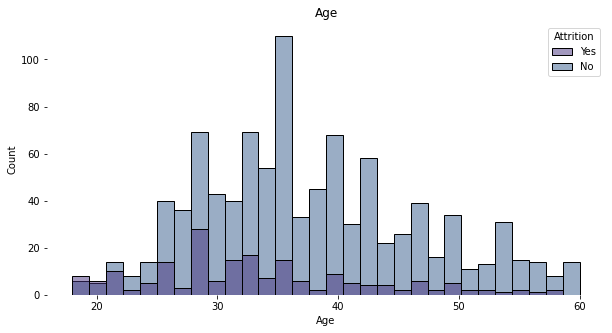

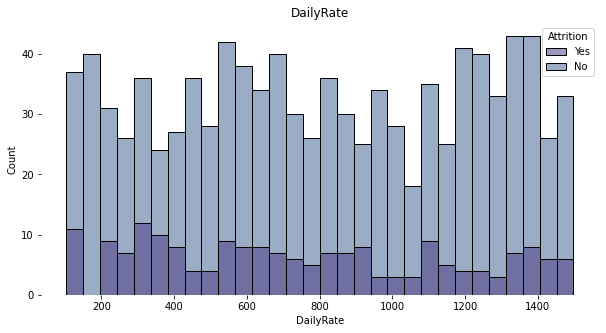

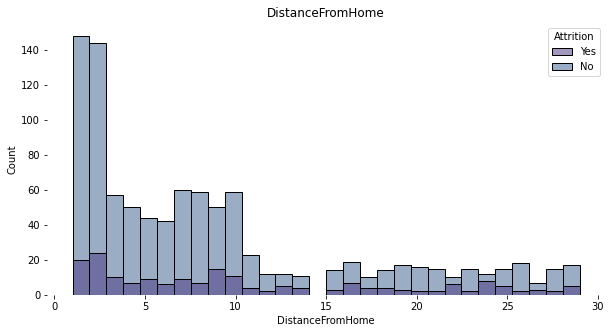

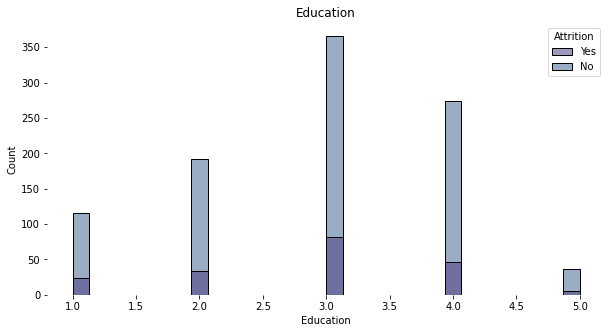

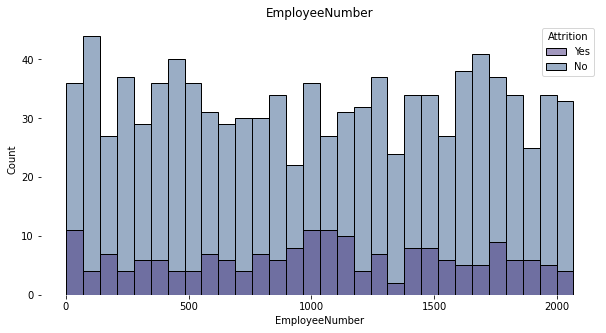

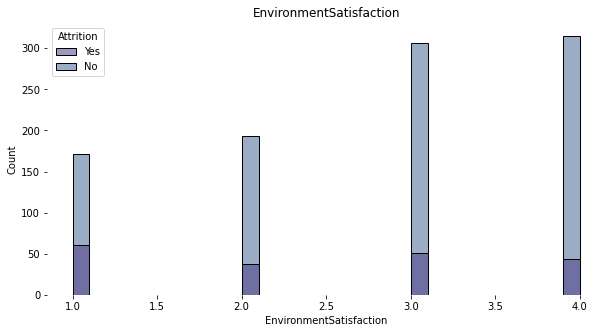

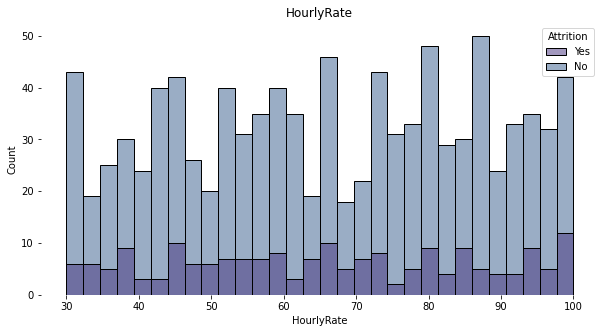

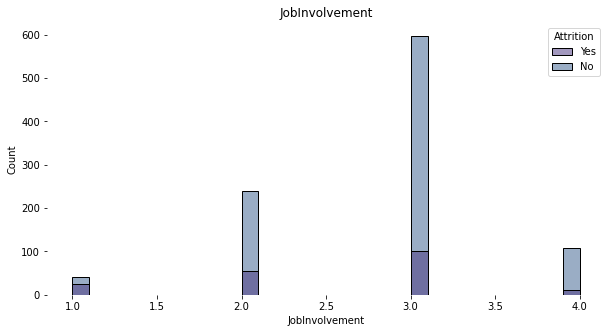

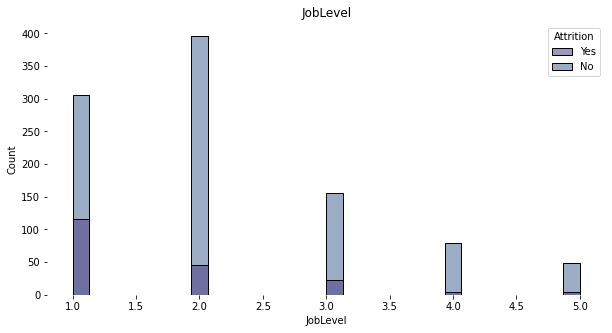

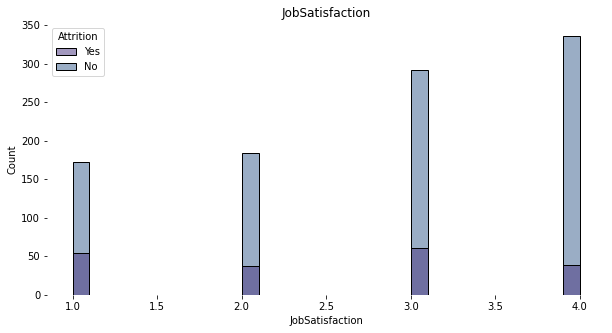

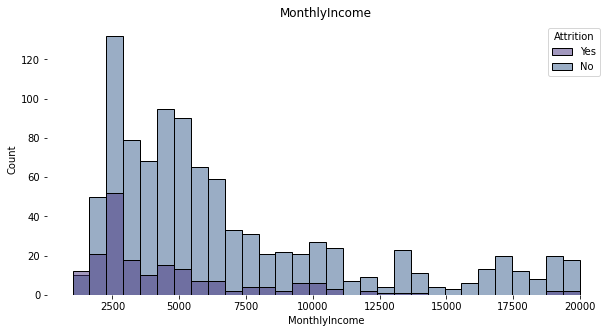

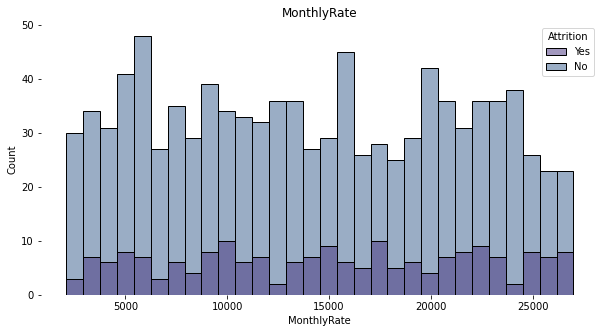

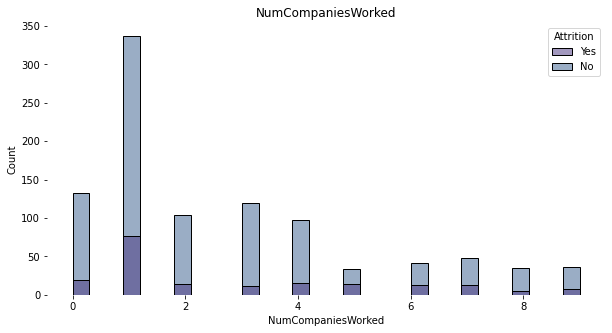

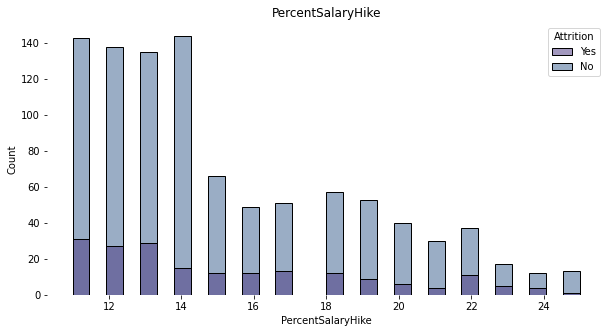

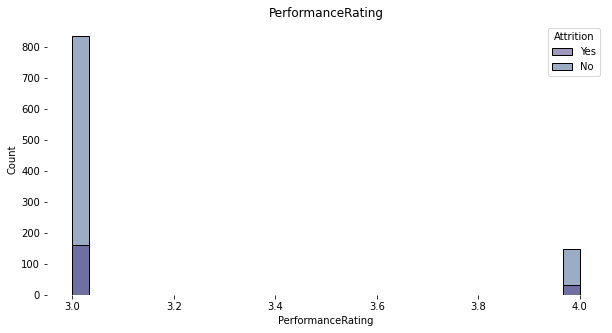

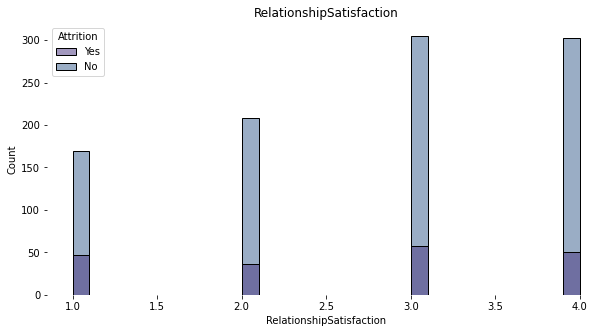

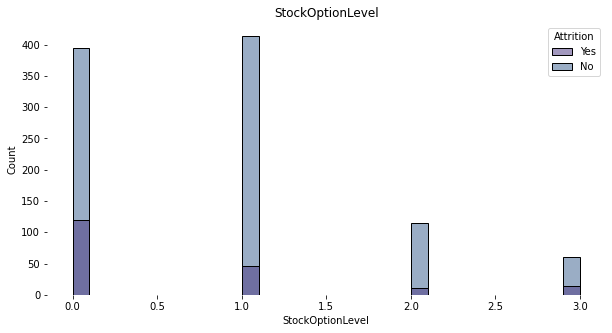

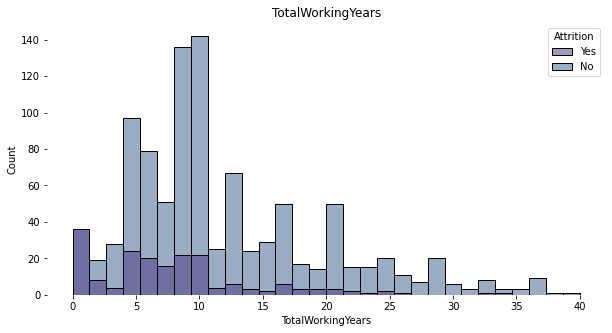

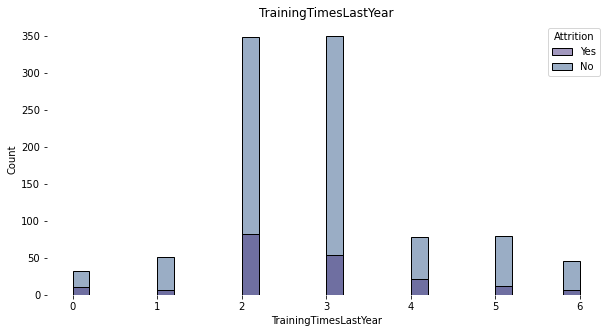

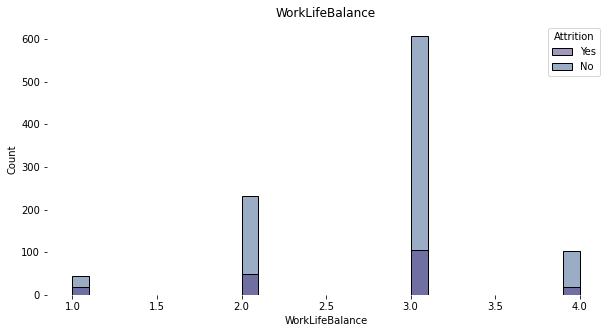

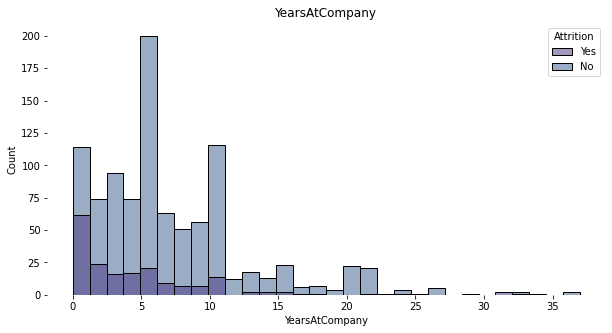

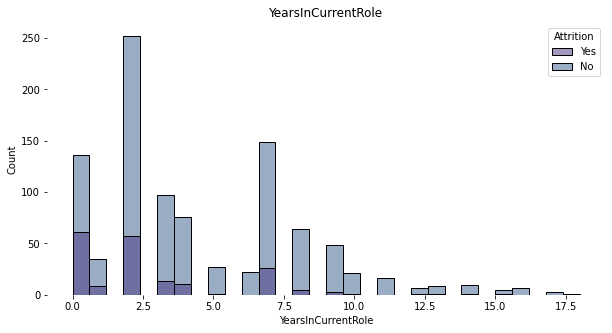

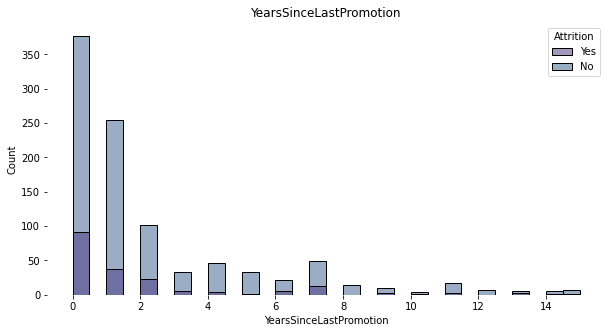

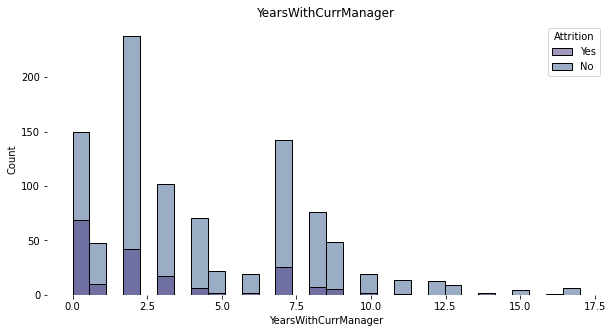

In [16]:
for n in num_variables.columns:
    if n != 'Attrition':
        sns.set_palette('viridis')

        plt.figure(figsize = (10, 5))
        sns.histplot(data = df1, x = n, hue = 'Attrition', bins = 30)
        sns.despine(bottom = True, left = True)
        plt.title(n)

***

**1. Age:**

Younger people, specially before 30 years old, quit job more often.

**2. Distance from Home**

There's many employees who live near from company's office who quit their job.


**3. Education:**

Employees with Bachelor degree tend to quit job more offen (based on absolute values. Need to analyze the percetage of this attribute)

**4. Job Level:**

Job level categorized in number one concentrate the major number of attritions.

**5. Monthly Income :**

Employees who have lower income tend to quit their jobs more often.

**6. Number of Companies Worked:**

People who had worked in only one company before tend to quit their currently job.

**7. Total Working Years**
Newer employees and people with few year experience quit job more ofeten.


***


In [17]:
num_variables1 = num_variables.drop(columns=(['Attrition']))

# Central Tendency
ct1 = pd.DataFrame(num_variables1.apply(np.mean)).T
ct2 = pd.DataFrame(num_variables1.apply(np.median)).T

# Dispersion
d1 = pd.DataFrame(num_variables1.apply(np.std)).T
d2 = pd.DataFrame(num_variables1.apply(min)).T
d3 = pd.DataFrame(num_variables1.apply(max)).T
d4 = pd.DataFrame(num_variables1.apply(lambda x: x.max() - x.min())).T

#concat
t = pd.concat([ct1, ct2, d1, d2, d3, d4]).T.reset_index()
t.columns = ['attribute', 'mean', 'median', 'std', 'min', 'max', 'range']
t

,attribute,mean,median,std,min,max,range
0,Age,36.853741,36.0,9.180301,18.0,60.0,42.0
1,DailyRate,794.631803,782.5,409.981663,103.0,1498.0,1395.0
2,DistanceFromHome,9.043367,7.0,8.032184,1.0,29.0,28.0
3,Education,2.914966,3.0,1.037354,1.0,5.0,4.0
4,EmployeeNumber,1025.220238,1029.5,603.412157,1.0,2068.0,2067.0
5,EnvironmentSatisfaction,2.715986,3.0,1.097748,1.0,4.0,3.0
6,HourlyRate,65.871599,66.0,20.298697,30.0,100.0,70.0
7,JobInvolvement,2.738095,3.0,0.710306,1.0,4.0,3.0
8,JobLevel,2.068878,2.0,1.090084,1.0,5.0,4.0
9,JobSatisfaction,2.744898,3.0,1.101742,1.0,4.0,3.0


### AGE

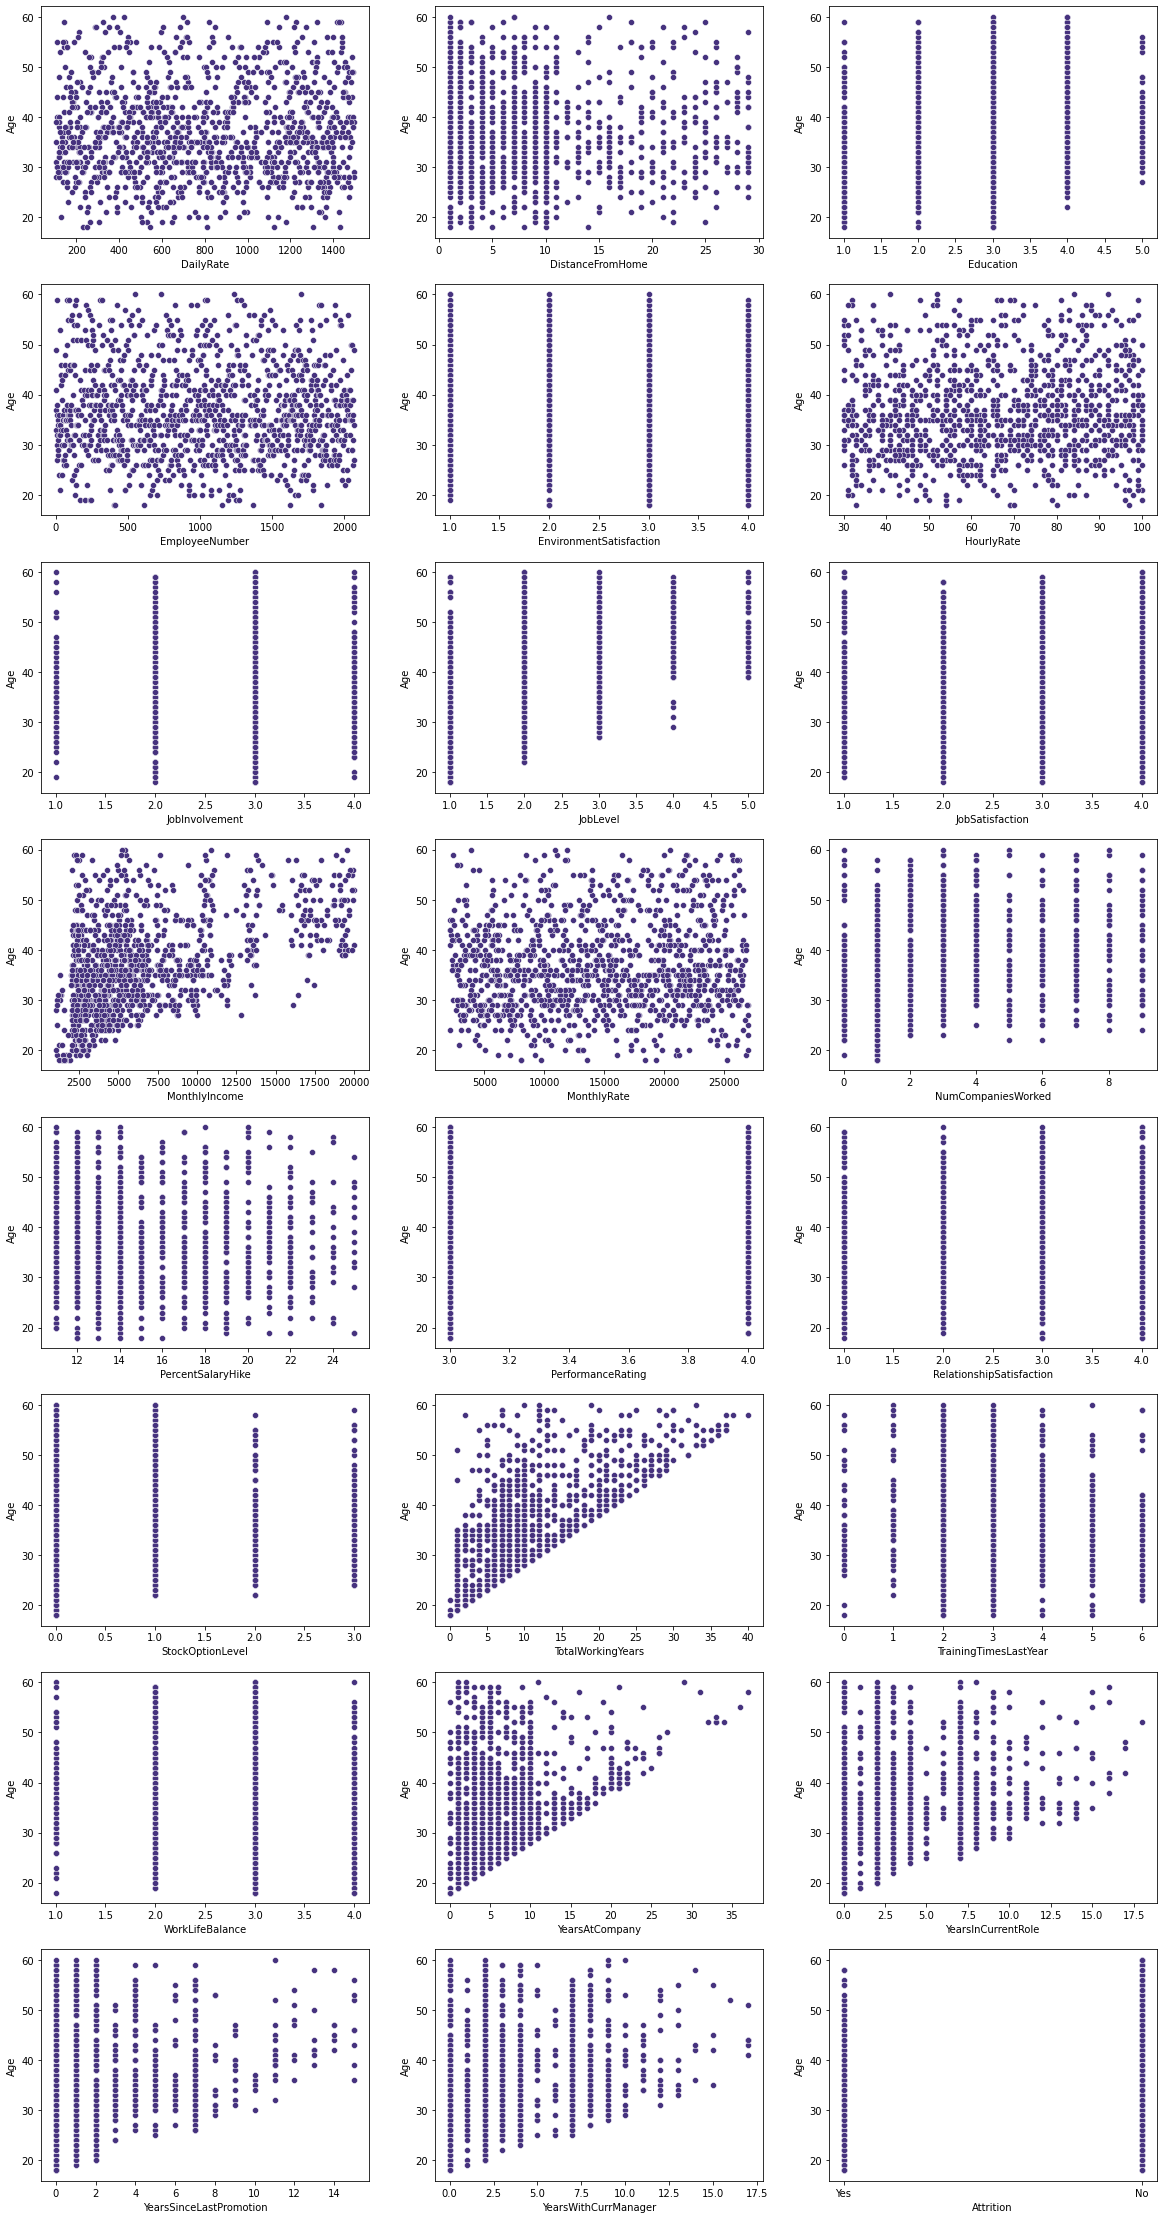

In [18]:
plt.figure(figsize = (20,40))
x = 1

for d in num_variables:
    if d != 'Age':
        sns.set_palette('viridis')
        plt.subplot(8, 3, x)
        sns.scatterplot(data = num_variables, x = d, y = 'Age')
        x += 1

### DistanceFromHome

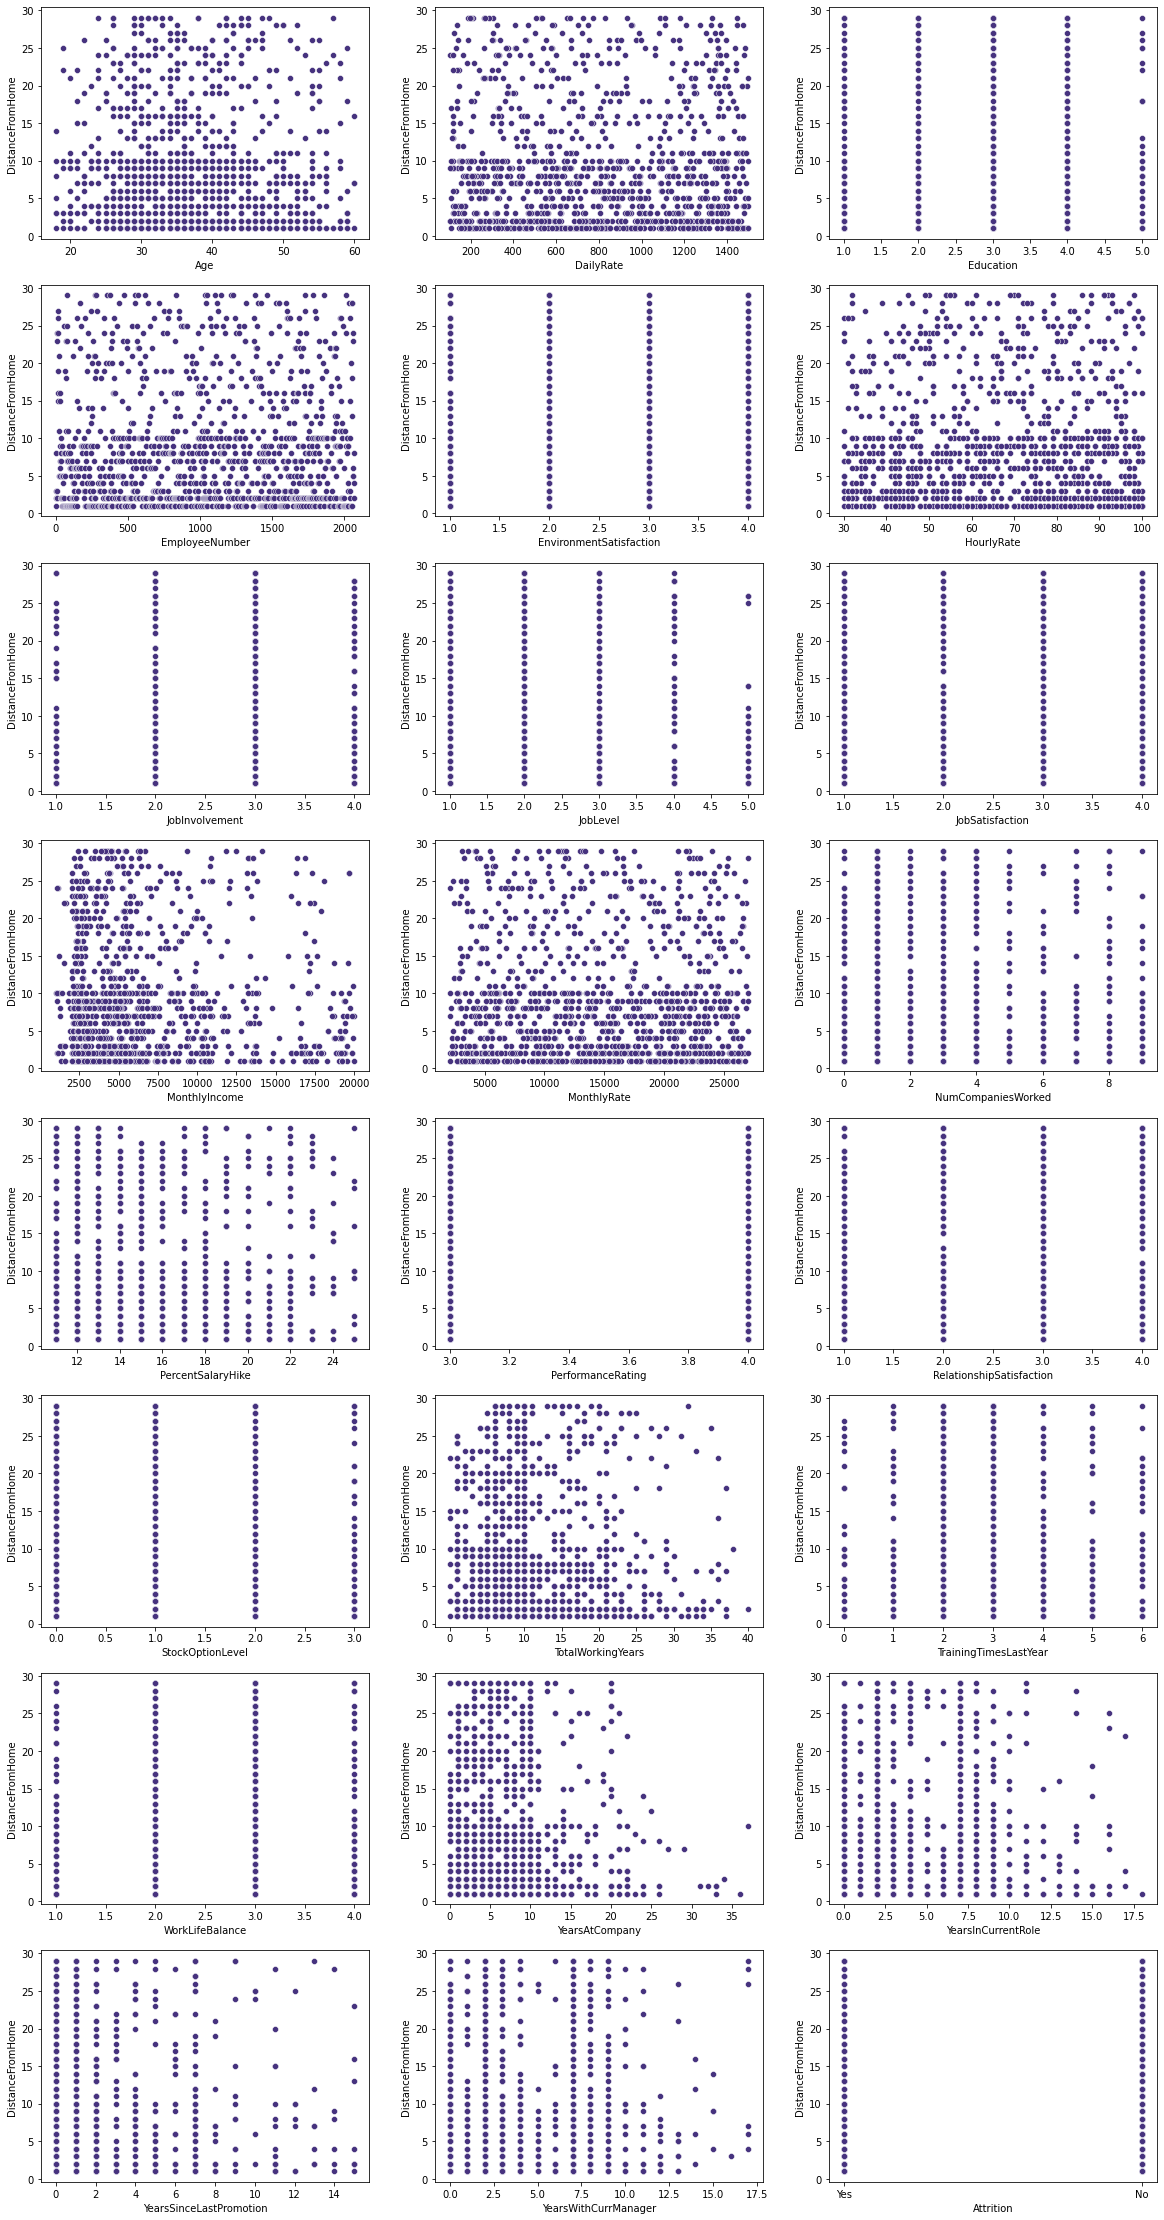

In [19]:
plt.figure(figsize = (20, 40))
x = 1

for d in num_variables:
    if d != 'DistanceFromHome':
        sns.set_palette('viridis')
        plt.subplot(8, 3, x)
        sns.scatterplot(data = num_variables, x = d, y = 'DistanceFromHome')
        x += 1


### MonthlyIncome

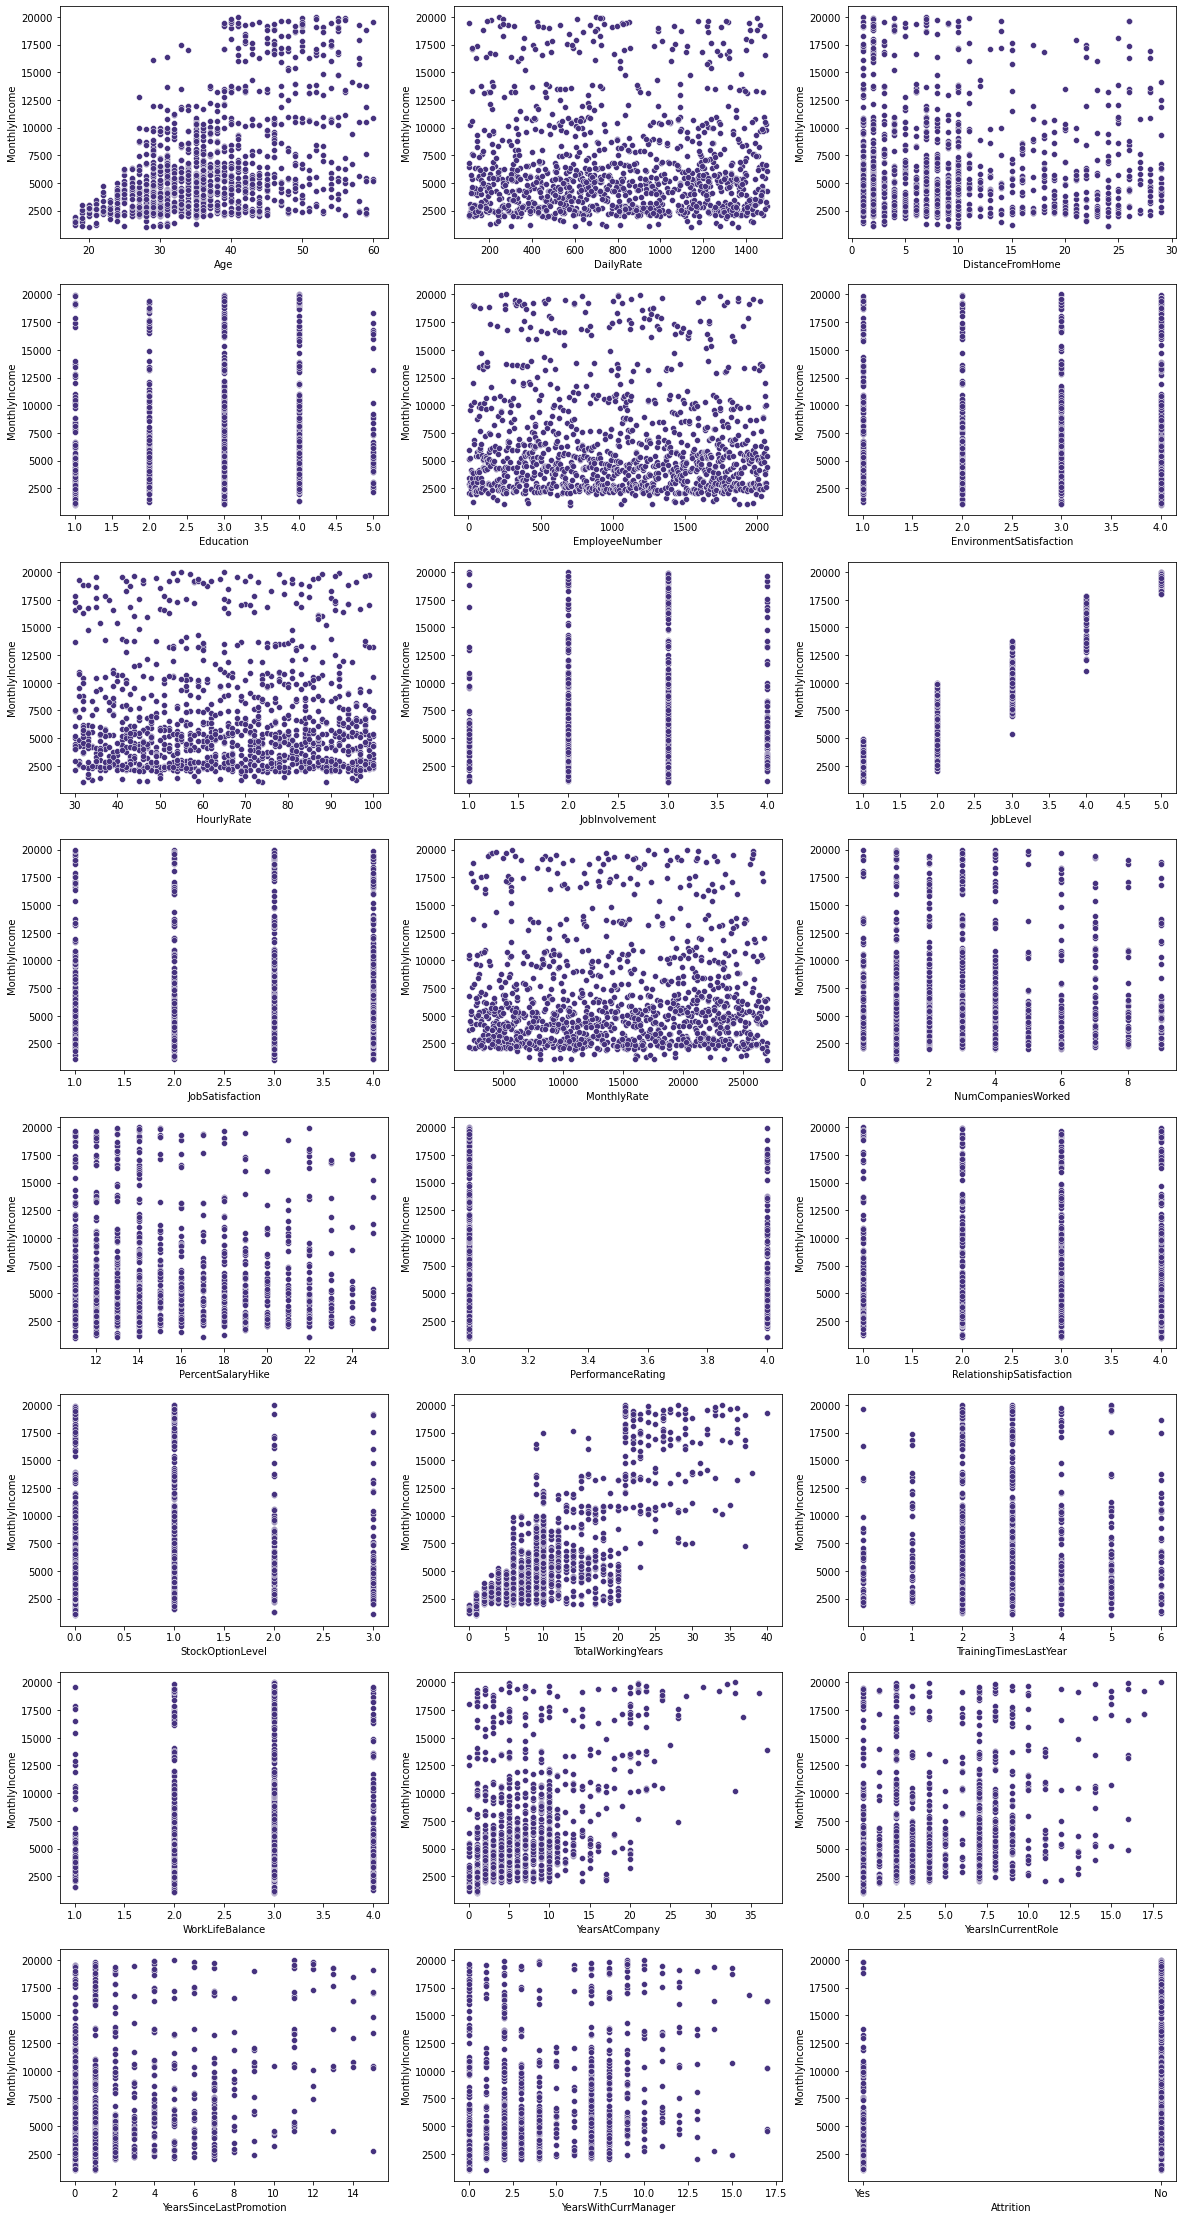

In [20]:
plt.figure(figsize = (20, 40))
x = 1

for d in num_variables:
    if d != 'MonthlyIncome':
        sns.set_palette('viridis')
        plt.subplot(8, 3, x)
        sns.scatterplot(data = num_variables, x = d, y = 'MonthlyIncome')
        x += 1


## Categorical Variables

In [21]:
# Selecting categoricla variables
cat_variables = df1.select_dtypes(exclude = ['int64', 'float64'])
cat_variables.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


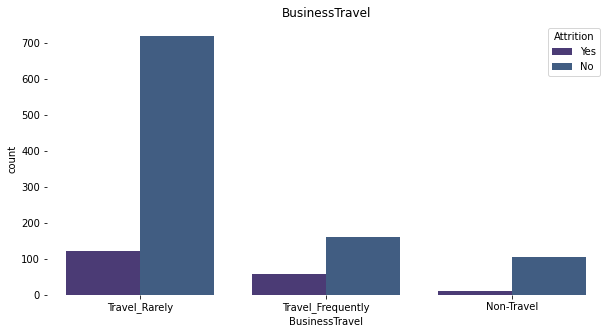

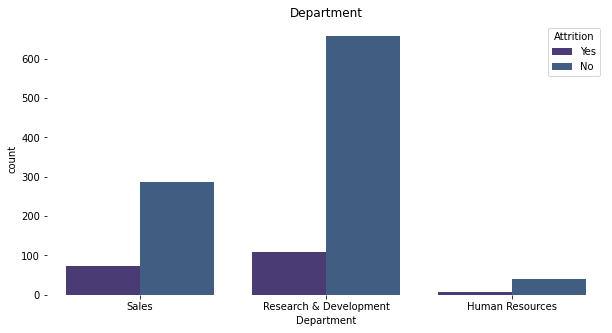

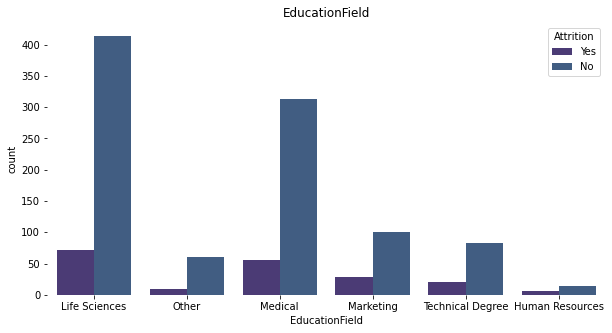

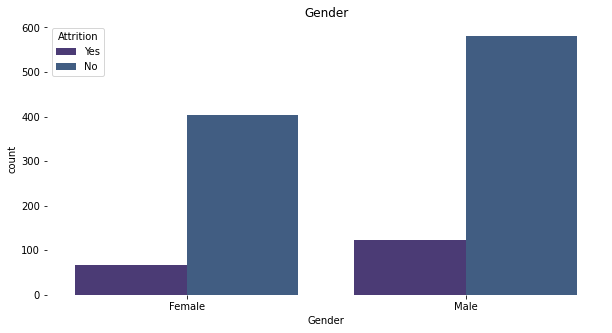

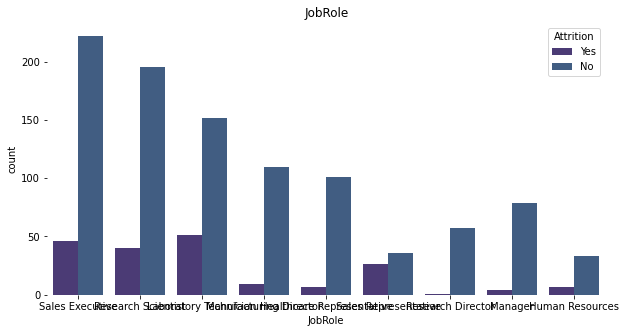

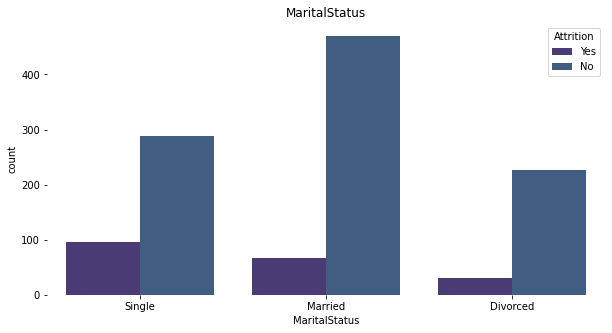

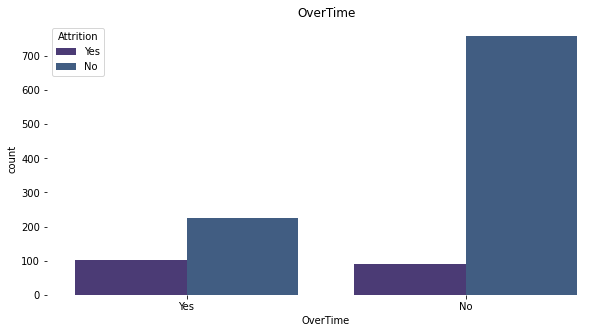

In [22]:
for d in cat_variables.columns:
    if d != 'Attrition':
        plt.figure(figsize=(10,5))
        sns.set_palette('viridis')
        sns.countplot(data = cat_variables, x = d, hue = 'Attrition')
        sns.despine(bottom = True, left = True)
        plt.title(d)

***

**1. Business Travel:**

People who travel more often have more attrition.

**2. Marital Status**

Single people quit their jobs more often.

***


## CATEGORICAL & NUMERICAL VARIABLES

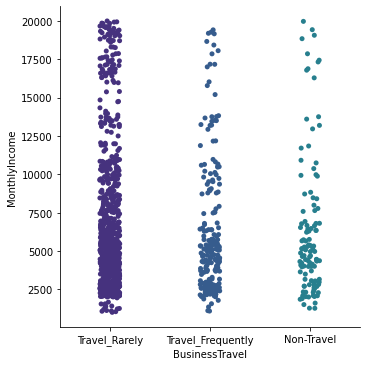

In [23]:
sns.catplot(data = df1, x = 'BusinessTravel', y = 'MonthlyIncome');

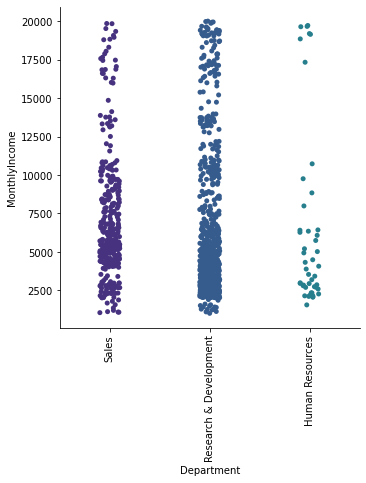

In [24]:
sns.catplot(data = df1, x = 'Department', y = 'MonthlyIncome')
plt.xticks(rotation = 90);

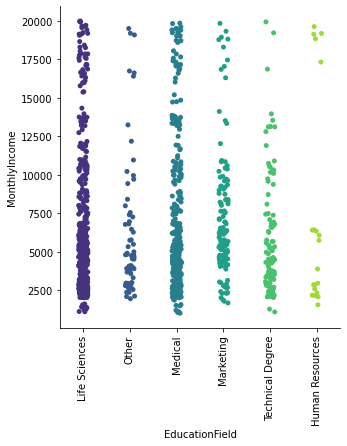

In [25]:
sns.catplot(data = df1, x = 'EducationField', y = 'MonthlyIncome')
plt.xticks(rotation = 90);

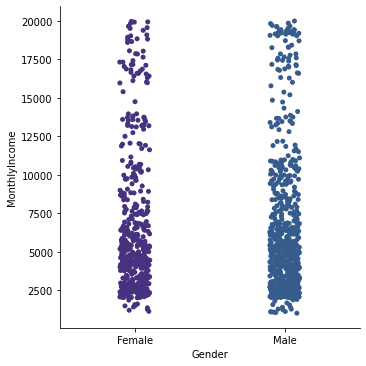

In [26]:
sns.catplot(data = df1, x = 'Gender', y = 'MonthlyIncome');

## CORRELATION

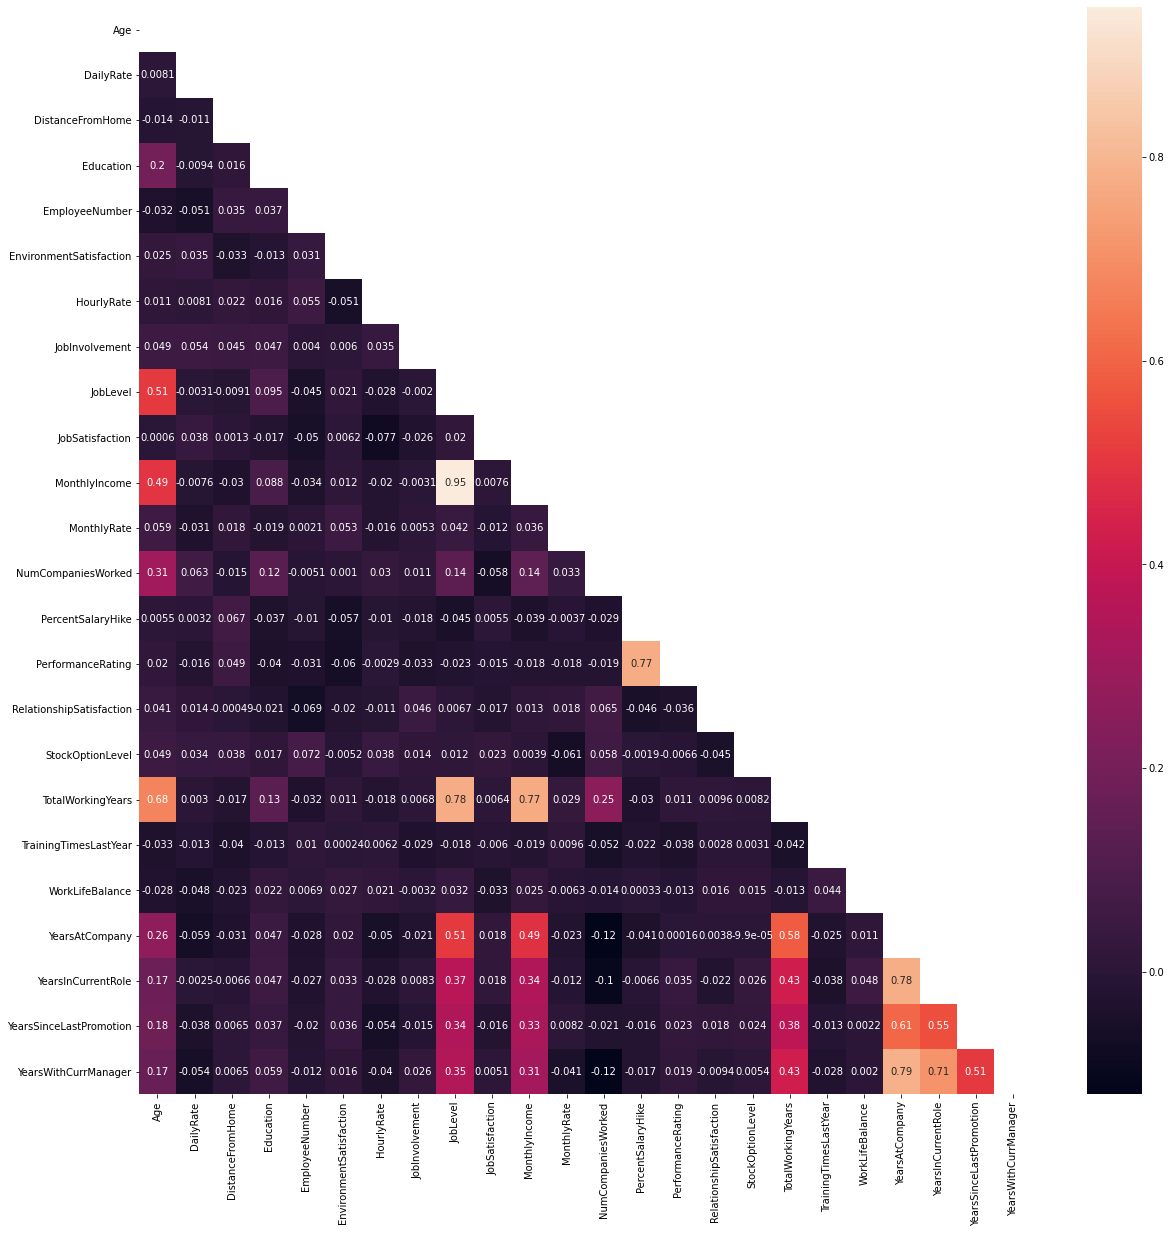

In [27]:

plt.figure(figsize= (20, 20))
sns.set_palette('viridis')
corr = num_variables.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.set_palette('viridis')
sns.heatmap(corr, mask = mask, annot= True);

Strong Correlation:

- MontlyIncome x JobLevel
- JobLebel x TotalWorkingYears
- TotalWorkingYears x Age
- JobLevel x YearsAtCompany
- TotalWorkingYears x YearAtCompany
- YearsCurrentRole x YearAtCompany
- YearsCurrentRole x YearAtCompany
- YearsSinceLastPromotion x YearsWithCurrManager


# DATA PREPARATION

In [28]:
def value_counts():
    for c in cat_variables.columns:
        print(cat_variables[c].value_counts())
        print('------------\n')
        
value_counts()        

No     985
Yes    191
Name: Attrition, dtype: int64
------------

Travel_Rarely        840
Travel_Frequently    219
Non-Travel           117
Name: BusinessTravel, dtype: int64
------------

Research & Development    768
Sales                     361
Human Resources            47
Name: Department, dtype: int64
------------

Life Sciences       486
Medical             368
Marketing           129
Technical Degree    104
Other                69
Human Resources      20
Name: EducationField, dtype: int64
------------

Male      704
Female    472
Name: Gender, dtype: int64
------------

Sales Executive              268
Research Scientist           235
Laboratory Technician        203
Manufacturing Director       119
Healthcare Representative    108
Manager                       83
Sales Representative          62
Research Director             58
Human Resources               40
Name: JobRole, dtype: int64
------------

Married     536
Single      383
Divorced    257
Name: MaritalStatus, dtype

### CATEGORICAL FEATURES

# Machine Learning Models

In [58]:
df2 = df1.copy()

df2 = df2.drop(columns=({'EmployeeNumber'}))

In [59]:
# Label encoder for categorical variables
le = LabelEncoder()

for i in df2[cat_variables.columns]:
    df2[i] = le.fit_transform(df2[i])
    

In [60]:
# MinMaxScaler for numerical variables

mms = MinMaxScaler()

cols = df2[['HourlyRate','MonthlyRate', 'MonthlyIncome', 'DailyRate']]

for i in df2[cols.columns]:
    df2[i] = mms.fit_transform(df2[[i]].values)

## Logistic Regression

In [75]:
X = df2.drop(columns=({'Attrition'}))
y = df2['Attrition'].ravel()

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# model
LR = LogisticRegression(C=1000, max_iter = 10000)
LR.fit(X_train, y_train)

print('Logistic Regression:\n')
print('Traning Model accruracy score: {:.3f}'.format(LR.score(X_train,y_train)))
print('Test Model accruracy score: {:.3f}'.format(LR.score(X_test,y_test)))


Logistic Regression:

Traning Model accruracy score: 0.890
Test Model accruracy score: 0.840


### KFold

In [85]:
kfold = KFold(n_splits=10)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.81 (0.06)
